In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()
# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.86996e-23): result may not be accurate.
  overwrite_a=True).T


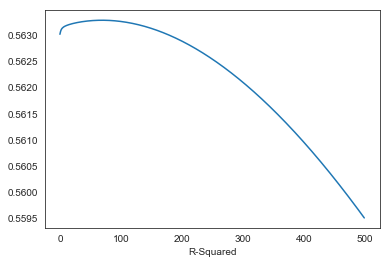

In [3]:
x = 0
numberingRidge = []
r2Ridge = []

#Run the Ridge model for many alphas and create list with R-Squared values and index numbering for each R-Squared value.
for lambd in range(0, 500):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    rSquaredRidge = ridgeregrBig.score(X_test2, Y_test)
    numberingRidge.append(x)
    x += 1
    r2Ridge.append(rSquaredRidge) 

#Create Dataframe for plot
ridgeValues = pd.DataFrame(
    {'numbering': numberingRidge,
     'r2': r2Ridge
    })

plt.plot(ridgeValues['numbering'], ridgeValues['r2'])
plt.xlabel('R-Squared')
plt.show()

c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\nstow\appdata\local\programs\python\python37\lib\site-packages\skle

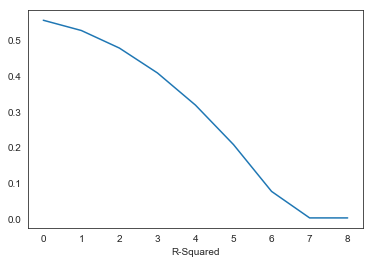

In [10]:
y = 0
numberingLasso = []
r2Lasso = []

holder = np.arange(0.1,1,0.1)
#Run the Lasso model for many alphas and create list with R-Squared values and index numbering for each R-Squared value.
for lambd in holder:
    lassoregrBig = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lassoregrBig.fit(X_train2, Y_train)
    rSquaredLasso = lassoregrBig.score(X_test2, Y_test)
    numberingLasso.append(y)
    y += 1
    r2Lasso.append(rSquaredLasso) 

#Create Dataframe for plot
lassoValues = pd.DataFrame(
    {'numbering': numberingLasso,
     'r2': r2Lasso
    })

plt.plot(lassoValues['numbering'], lassoValues['r2'])
plt.xlabel('R-Squared')
plt.show()

## Both Ridge and Lasso have decreasing R-squared values as lambda increase. Lasso only has a decrease in the R-Squared value, whereas Ridge increases slightly after lambda increases from zero and then decreases again. This says that for both models, as lambda increases, the data no longer fits as well to the regression line that is created, except for a small period after 0 with Ridge Regression.